In [2]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import re
from urllib.parse import parse_qs,urlparse


color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
pd.set_option('display.max_colwidth', -1)
table_styles = [{'selector': 'td',
                 'props': [('min-width', '100px'), ('text-align', 'center')]},
                {'selector': 'tr',
                 'props': [('border-bottom', '1px dotted black')]},
                {'selector': 'th',
                 'props': [('text-align', 'center')]}
               ]

%matplotlib inline

directory = "url_top_lists/"
stream = "comparison"

/media/raid/home/pflugmacher/virtualenv/twitterenvold/lib/python3.4/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/media/raid/home/pflugmacher/virtualenv/twitterenvold/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Top 100 URLs - Content Categories

Text(0.5,1,'Top 100 URLs shared')

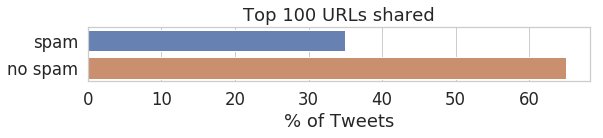

In [19]:
y = ['spam', 'no spam']
x = [35, 65]

plt.figure(figsize=(9,1))
ax = sns.barplot(y=y, x=x)
ax.set_xlabel("% of Tweets")
ax.set_title("Top 100 URLs shared")

Text(0.5,1,'No Spam - Top 100 URLs shared')

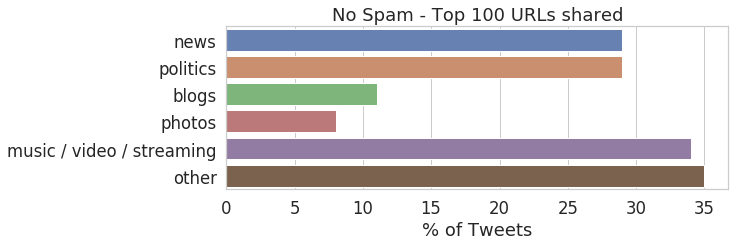

In [18]:
y1 = ['news', 'politics', 'blogs', 'photos', 'music / video / streaming', 'other']
x2 = [29, 29, 11, 8, 34, 35]


plt.figure(figsize=(9,3))

ax = sns.barplot(y=y, x=x)
ax.set_xlabel("% of Tweets")
ax.set_title("No Spam - Top 100 URLs shared")


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
